# Disaster Tweet Classification Analysis

### Project Overview
This project focuses on classifying tweets as disaster-related or non-disaster-related to help identify real-time disaster information. Using NLP techniques like tokenization, stop word removal, and lemmatization, we preprocess tweet text for analysis. We apply TF-IDF to extract relevant features and use SMOTE-NC to handle data imbalance, ensuring balanced training data. The resulting machine learning model can effectively flag tweets about real disasters, offering timely information that could aid in emergency response efforts.

# Disaster Tweet Analyzer
This notebook aims to analyze tweets related to disasters, classify them, and prepare the dataset for machine learning model development.

## 1. Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

## 2. Load the Dataset
Load the dataset containing tweets. The dataset was chosen based on criteria such as the number of tweets and data quality.

In [3]:
# Step 1: Load the dataset
data_file_path = 'C:/SKILLS/Springboard/Jupyter/tweets.csv'
tweets_df = pd.read_csv(data_file_path)
tweets_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


## 3. Data Exploration
Initial exploration of the dataset to understand its structure and check for any missing values.

In [4]:
# Display the first few rows of the dataset
tweets_df.head()

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


## 3. Data Preprocessing

### 3.1 Data Cleaning

In [5]:
# Cleaning the text data by removing special characters and numbers
def clean_text(text):
    # Remove URLs and mentions but keep words in any language
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    # Keep alphabets from any language, numbers and spaces; remove everything else
    text = re.sub(r'[^A-Za-z0-9가-힣\s]', '', text)  # This includes Korean characters
    return text.lower()  # Convert to lowercase to maintain consistency
    
# Dropping the 'id' column from the dataset
tweets_df = tweets_df.drop(columns=['id'])

tweets_df['cleaned_text'] = tweets_df['text'].apply(clean_text)
tweets_df.head()

,keyword,location,text,target,cleaned_text
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...


#### Handling Categorical Variables
One-hot encoding is applied to categorical features, such as the keyword column.

In [6]:
# Check for missing values in the dataset
tweets_df.isnull().sum()

keyword            0
location        3418
text               0
target             0
cleaned_text       0
dtype: int64

### 3.2 Tokenization

In [7]:
tweets_df['tokens'] = tweets_df['cleaned_text'].apply(word_tokenize)

In [8]:
# Display the first few rows to check tokenization
tweets_df[['cleaned_text', 'tokens']].head()


,cleaned_text,tokens
0,communal violence in bhainsa telangana stones ...,"[communal, violence, in, bhainsa, telangana, s..."
1,telangana section 144 has been imposed in bhai...,"[telangana, section, 144, has, been, imposed, ..."
2,arsonist sets cars ablaze at dealership,"[arsonist, sets, cars, ablaze, at, dealership]"
3,arsonist sets cars ablaze at dealership,"[arsonist, sets, cars, ablaze, at, dealership]"
4,lord jesus your love brings freedom and pardon...,"[lord, jesus, your, love, brings, freedom, and..."


### 3.3 Stopword Removal

In [9]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords

In [11]:
stop_words = set(stopwords.words('english'))


In [12]:
# Removing stopwords from the tokenized data
tweets_df['tokens'] = tweets_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

In [13]:
# Checking a few examples to ensure stopwords are removed
print(tweets_df['tokens'].head())

0    [communal, violence, bhainsa, telangana, stone...
1    [telangana, section, 144, imposed, bhainsa, ja...
2           [arsonist, sets, cars, ablaze, dealership]
3           [arsonist, sets, cars, ablaze, dealership]
4    [lord, jesus, love, brings, freedom, pardon, f...
Name: tokens, dtype: object


### 3.4 Lemmatization

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  # Download WordNet if not already done
nltk.download('omw-1.4')  # Download additional resources for lemmatizer


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [15]:
lemmatizer = WordNetLemmatizer()


In [16]:
tweets_df['lemmatized'] = tweets_df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [17]:
for i in range(5):  # Displaying the first 5 rows
    print(f"Lemmatized tokens for row {i}: {tweets_df['lemmatized'][i]}")


Lemmatized tokens for row 0: ['communal', 'violence', 'bhainsa', 'telangana', 'stone', 'pelted', 'muslim', 'house', 'house', 'vehicle', 'set', 'ablaze']
Lemmatized tokens for row 1: ['telangana', 'section', '144', 'imposed', 'bhainsa', 'january', '13', '15', 'clash', 'erupted', 'two', 'group', 'january', '12', 'po']
Lemmatized tokens for row 2: ['arsonist', 'set', 'car', 'ablaze', 'dealership']
Lemmatized tokens for row 3: ['arsonist', 'set', 'car', 'ablaze', 'dealership']
Lemmatized tokens for row 4: ['lord', 'jesus', 'love', 'brings', 'freedom', 'pardon', 'fill', 'holy', 'spirit', 'set', 'heart', 'ablaze', 'l']


## 4. Exploratory Data Analysis
Visualize the distribution of disaster and non-disaster tweets to gain insights.

### Data Visualization

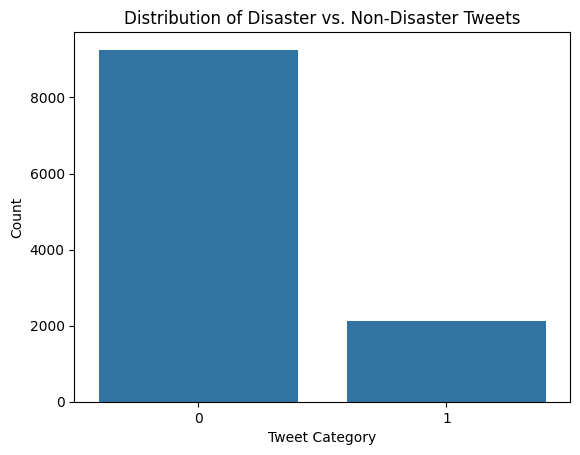

In [18]:
# Plotting the distribution of the target variable
sns.countplot(x='target', data=tweets_df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Category')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_26704\1940034949.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


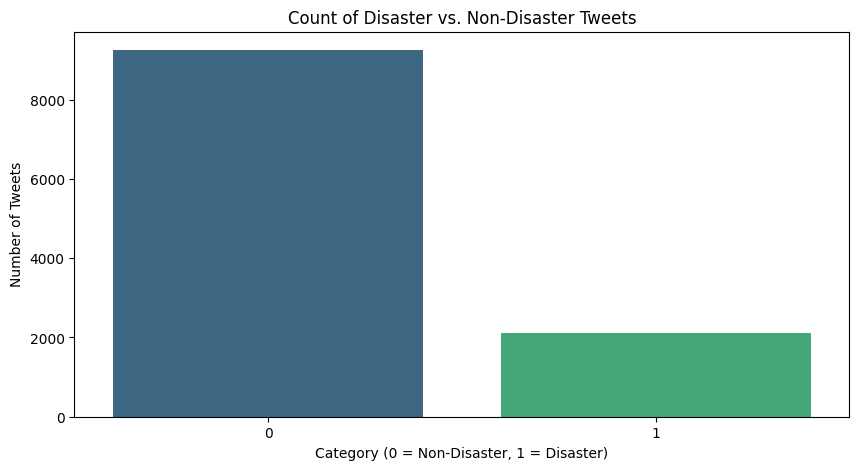

In [19]:
# Plot the number of disaster and non-disaster tweets
disaster_counts = tweets_df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

#### Most Common Keywords in Disaster Tweets

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\HP\AppData\Local\Temp\ipykernel_26704\1577014280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


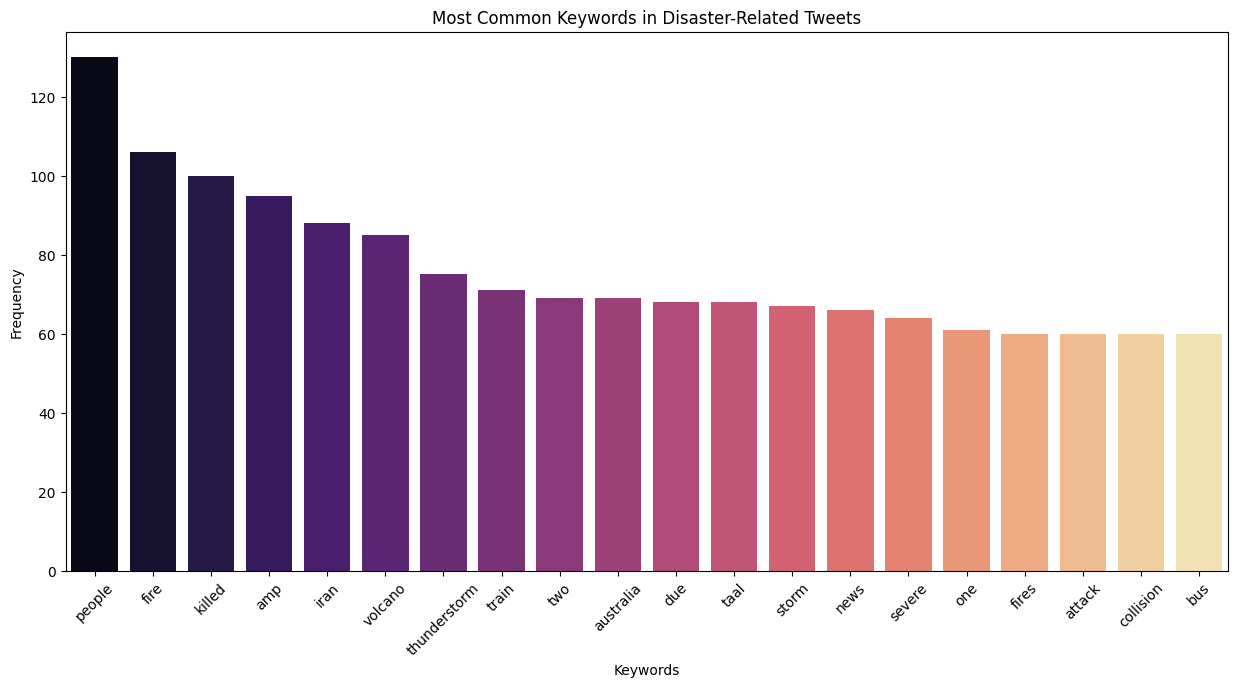

In [20]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
disaster_tweets = tweets_df[tweets_df['target'] == 1]['cleaned_text']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in stop_words]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Word Cloud

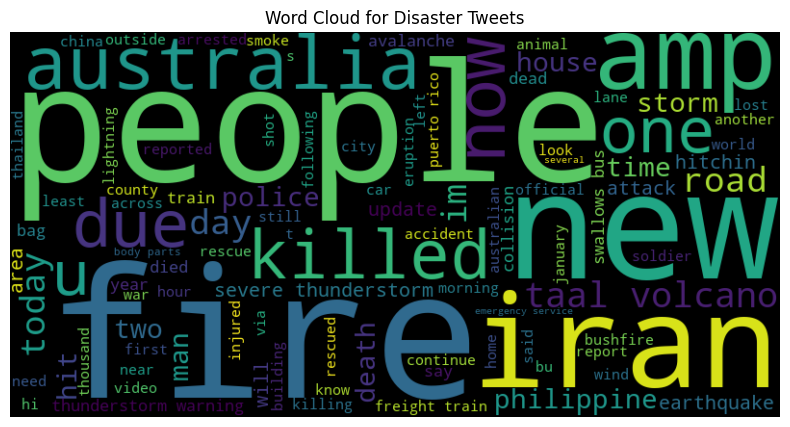

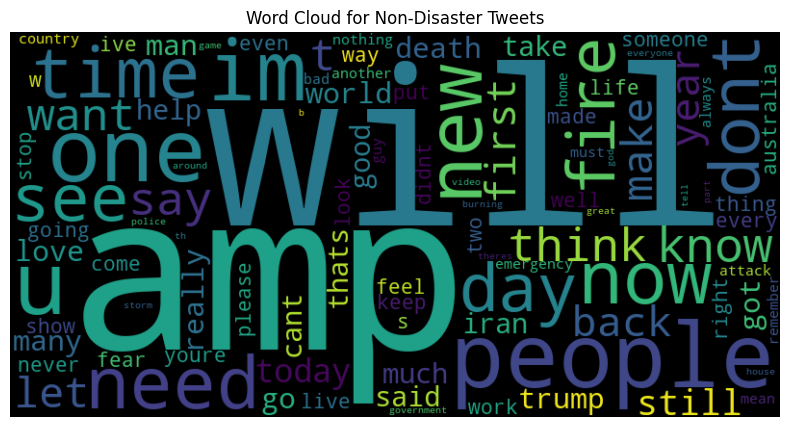

In [21]:
# Generating word clouds for disaster (target) and non-disaster (non-target) tweets
disaster_text = ' '.join(tweets_df[tweets_df['target'] == 1]['cleaned_text'])
non_disaster_text = ' '.join(tweets_df[tweets_df['target'] == 0]['cleaned_text'])

# Word cloud for disaster tweets
disaster_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(disaster_text)
plt.figure(figsize=(10, 5))
plt.imshow(disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Disaster Tweets')
plt.axis('off')
plt.show()

# Word cloud for non-disaster tweets
non_disaster_wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='black').generate(non_disaster_text)
plt.figure(figsize=(10, 5))
plt.imshow(non_disaster_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Disaster Tweets')
plt.axis('off')
plt.show()

In [22]:
tweets_df.head()

,keyword,location,text,target,cleaned_text,tokens,lemmatized
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1,communal violence in bhainsa telangana stones ...,"[communal, violence, bhainsa, telangana, stone...","[communal, violence, bhainsa, telangana, stone..."
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1,telangana section 144 has been imposed in bhai...,"[telangana, section, 144, imposed, bhainsa, ja...","[telangana, section, 144, imposed, bhainsa, ja..."
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership,"[arsonist, sets, cars, ablaze, dealership]","[arsonist, set, car, ablaze, dealership]"
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1,arsonist sets cars ablaze at dealership,"[arsonist, sets, cars, ablaze, dealership]","[arsonist, set, car, ablaze, dealership]"
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0,lord jesus your love brings freedom and pardon...,"[lord, jesus, love, brings, freedom, pardon, f...","[lord, jesus, love, brings, freedom, pardon, f..."


### n-gram Analysis

In [23]:
from nltk import ngrams
from collections import Counter

def get_top_ngrams(texts, n=2, top_k=10):
    """
    Get the top N n-grams from a list of texts.
    :param texts: List of tokenized texts
    :param n: Size of the n-gram (e.g., 2 for bigram, 3 for trigram)
    :param top_k: Number of top n-grams to return
    :return: List of tuples with the n-grams and their counts
    """
    ngram_list = []
    for tokens in texts:
        ngram_list.extend(ngrams(tokens, n))
    ngram_counts = Counter(ngram_list)
    return ngram_counts.most_common(top_k)

# Separate disaster and non-disaster tweets
disaster_tweets = tweets_df[tweets_df['target'] == 1]['tokens']
non_disaster_tweets = tweets_df[tweets_df['target'] == 0]['tokens']

# Get the top trigrams for disaster tweets
top_disaster_trigrams = get_top_ngrams(disaster_tweets, n=3, top_k=10)
print("\nTop 10 Trigrams in Disaster Tweets:")
print(top_disaster_trigrams)

# Get the top trigrams for non-disaster tweets
top_non_disaster_trigrams = get_top_ngrams(non_disaster_tweets, n=3, top_k=10)
print("\nTop 10 Trigrams in Non-Disaster Tweets:")
print(top_non_disaster_trigrams)




Top 10 Trigrams in Disaster Tweets:
[(('severe', 'thunderstorm', 'warning'), 35), (('sinkhole', 'swallows', 'bus'), 16), (('thunderstorm', 'warning', 'including'), 15), (('low', 'speed', 'derailment'), 14), (('body', 'parts', 'found'), 13), (('weather', 'alert', 'severe'), 13), (('alert', 'severe', 'thunderstorm'), 13), (('china', 'sinkhole', 'six'), 12), (('grandmothers', 'prayer', 'closet'), 12), (('prayer', 'closet', 'survives'), 12)]

Top 10 Trigrams in Non-Disaster Tweets:
[(('triumphant', 'party', 'gove'), 35), (('party', 'gove', 'heart'), 35), (('schools', 'brace', 'five'), 34), (('brace', 'five', 'years'), 34), (('five', 'years', 'upheaval'), 34), (('years', 'upheaval', 'triumphant'), 34), (('upheaval', 'triumphant', 'party'), 34), (('battle', 'id', 'need'), 23), (('id', 'need', 'backup'), 23), (('need', 'backup', 'lvl'), 23)]


## 5. Feature Engineering

### Bag of Words
Represents text as word frequency vectors

In [24]:
print(tweets_df.head())
print(tweets_df.info())
print(tweets_df.isnull().sum())
print(tweets_df.describe(include='all'))


  keyword        location                                               text  \
0  ablaze             NaN  Communal violence in Bhainsa, Telangana. "Ston...   
1  ablaze             NaN  Telangana: Section 144 has been imposed in Bha...   
2  ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3  ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4  ablaze             NaN  "Lord Jesus, your love brings freedom and pard...   

   target                                       cleaned_text  \
0       1  communal violence in bhainsa telangana stones ...   
1       1  telangana section 144 has been imposed in bhai...   
2       1           arsonist sets cars ablaze at dealership    
3       1          arsonist sets cars ablaze at dealership     
4       0  lord jesus your love brings freedom and pardon...   

                                              tokens  \
0  [communal, violence, bhainsa, telangana, stone...   
1  [telangana, section

Shape of BoW matrix: (11370, 5000)
Shape of One-Hot Encoded matrix: (11370, 219)
Shape of Combined Features matrix: (11370, 5219)


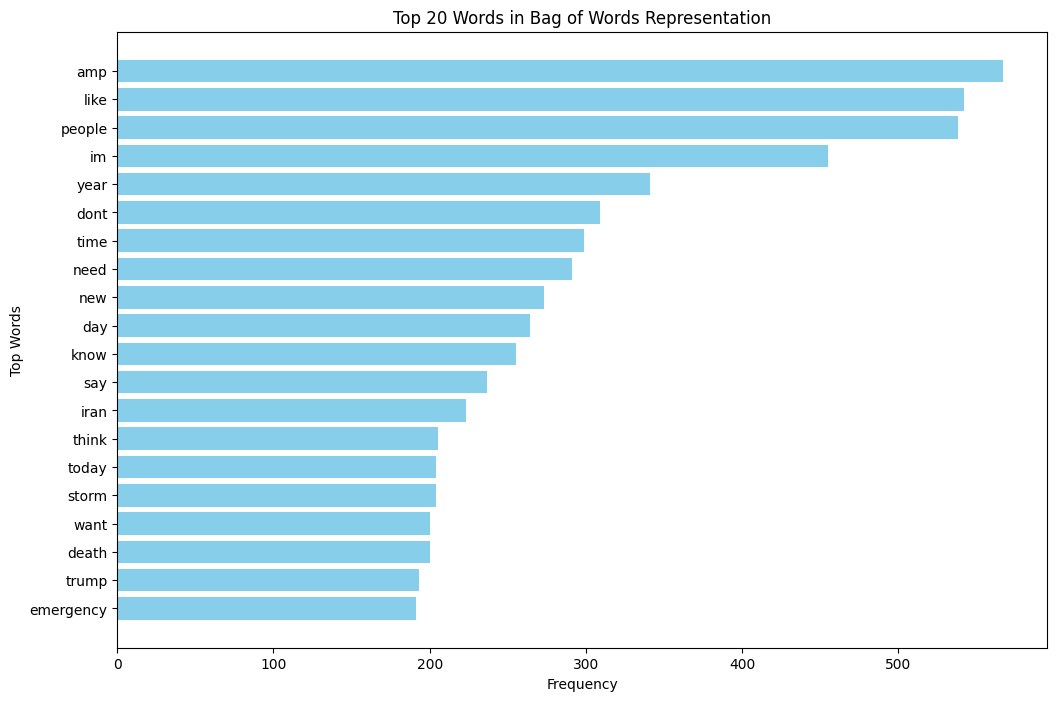

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
from scipy.sparse import hstack
from sklearn.preprocessing import OneHotEncoder

# Initialize CountVectorizer for Bag of Words
bow_vectorizer = CountVectorizer(max_features=5000, stop_words='english')  # You can adjust max_features
X_text_bow = bow_vectorizer.fit_transform(tweets_df['lemmatized'].apply(lambda x: ' '.join(x)))

# Optional: Encode any categorical variables like 'keyword'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_keyword_bow = encoder.fit_transform(tweets_df[['keyword']])

# Combine BoW text vectors with encoded categorical features
X_combined_bow = hstack([X_text_bow, X_keyword_bow])

# Check the shape of the generated matrices
print("Shape of BoW matrix:", X_text_bow.shape)
print("Shape of One-Hot Encoded matrix:", X_keyword_bow.shape)
print("Shape of Combined Features matrix:", X_combined_bow.shape)

# Visualization of the Top 20 Words in Bag of Words Representation
word_counts = X_text_bow.toarray().sum(axis=0)
words = bow_vectorizer.get_feature_names_out()
bow_df = pd.DataFrame({'word': words, 'count': word_counts})

# Sort words by frequency
top_words = bow_df.sort_values(by='count', ascending=False).head(20)

# Plot the top 20 words by frequency
plt.figure(figsize=(12, 8))
plt.barh(top_words['word'], top_words['count'], color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Top Words")
plt.title("Top 20 Words in Bag of Words Representation")
plt.gca().invert_yaxis()
plt.show()


### TF-TDF

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TfidfVectorizer to convert text into numerical data
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your data

# Apply TF-IDF to your cleaned text or lemmatized column
X_text = tfidf.fit_transform(tweets_df['lemmatized'].apply(lambda x: ' '.join(x)))  # Convert list of tokens to string

from sklearn.preprocessing import OneHotEncoder

# Use OneHotEncoder for categorical features like 'keyword'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_keyword = encoder.fit_transform(tweets_df[['keyword']])

from scipy.sparse import hstack

# Combine TF-IDF text vectors and encoded categorical features
X_combined = hstack([X_text, X_keyword])

print("Shape of TF-IDF matrix:", X_text.shape)
print("Shape of One-Hot Encoded matrix:", X_keyword.shape)

from scipy.sparse import hstack

# Combine TF-IDF text vectors and encoded categorical features
X_combined = hstack([X_text, X_keyword])

# Check the shape of the combined features
print("Shape of Combined Features matrix:", X_combined.shape)


Shape of TF-IDF matrix: (11370, 5000)
Shape of One-Hot Encoded matrix: (11370, 219)
Shape of Combined Features matrix: (11370, 5219)


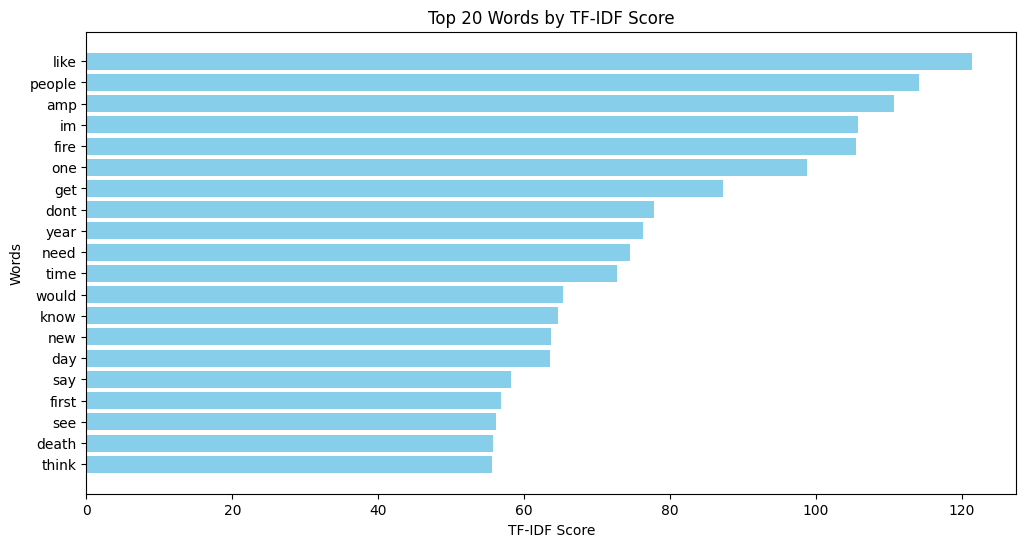

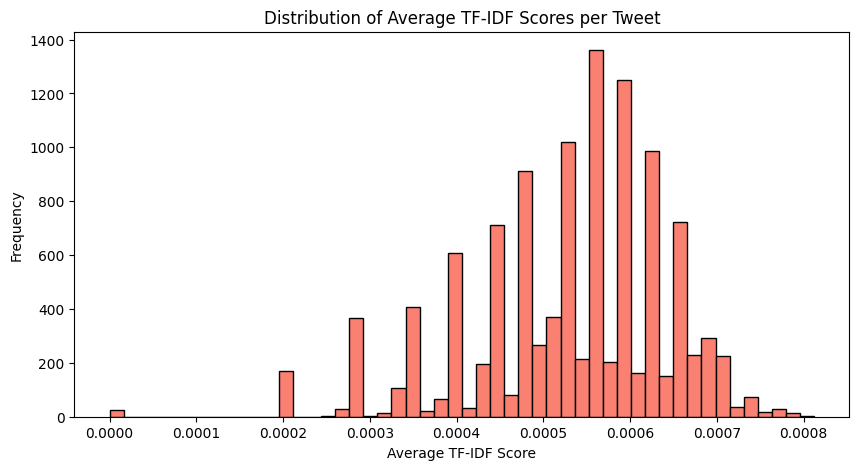

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get feature names and sum TF-IDF scores for each word across all tweets
feature_names = tfidf.get_feature_names_out()
tfidf_scores = np.asarray(X_text.sum(axis=0)).flatten()

# Create a DataFrame with words and their corresponding TF-IDF scores
tfidf_df = pd.DataFrame({'word': feature_names, 'tfidf_score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='tfidf_score', ascending=False).reset_index(drop=True)

# Plot top N words with the highest TF-IDF scores
top_n = 20  # Number of top words to display
plt.figure(figsize=(12, 6))
plt.barh(tfidf_df['word'].head(top_n), tfidf_df['tfidf_score'].head(top_n), color='skyblue')
plt.gca().invert_yaxis()
plt.title(f'Top {top_n} Words by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.show()

# Plot distribution of average TF-IDF scores across tweets
avg_tfidf_scores = np.asarray(X_text.mean(axis=1)).flatten()
plt.figure(figsize=(10, 5))
plt.hist(avg_tfidf_scores, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Average TF-IDF Scores per Tweet')
plt.xlabel('Average TF-IDF Score')
plt.ylabel('Frequency')
plt.show()


## 6. Balancing the Dataset
Using SMOTE-NC to balance the classes in the dataset by oversampling the minority class (disaster-related tweets).

In [28]:
!pip install imbalanced-learn


DEPRECATION: Loading egg at c:\python tutorial\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


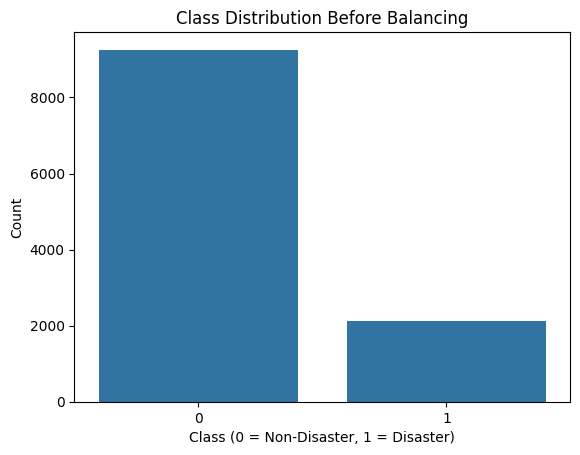

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initial class distribution
sns.countplot(x='target', data=tweets_df)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class (0 = Non-Disaster, 1 = Disaster)")
plt.ylabel("Count")
plt.show()


In [31]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define categorical feature indices for SMOTE-NC
categorical_features = [X_combined.shape[1] - 1]  # Assuming the last column is categorical (keyword)

# Split data into features and labels
X_train, X_test, y_train, y_test = train_test_split(X_combined, tweets_df['target'], test_size=0.2, random_state=42)

# Initialize SMOTE-NC and RandomUnderSampler
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
under_sampler = RandomUnderSampler(random_state=42)

# Create a pipeline for SMOTE-NC followed by undersampling
pipeline = Pipeline(steps=[('smote', smote_nc), ('under', under_sampler)])

# Fit and resample the training data
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Display the new class distribution
print("Class distribution after SMOTE-NC and undersampling:", dict(pd.Series(y_resampled).value_counts()))


Class distribution after SMOTE-NC and undersampling: {0: np.int64(7378), 1: np.int64(7378)}


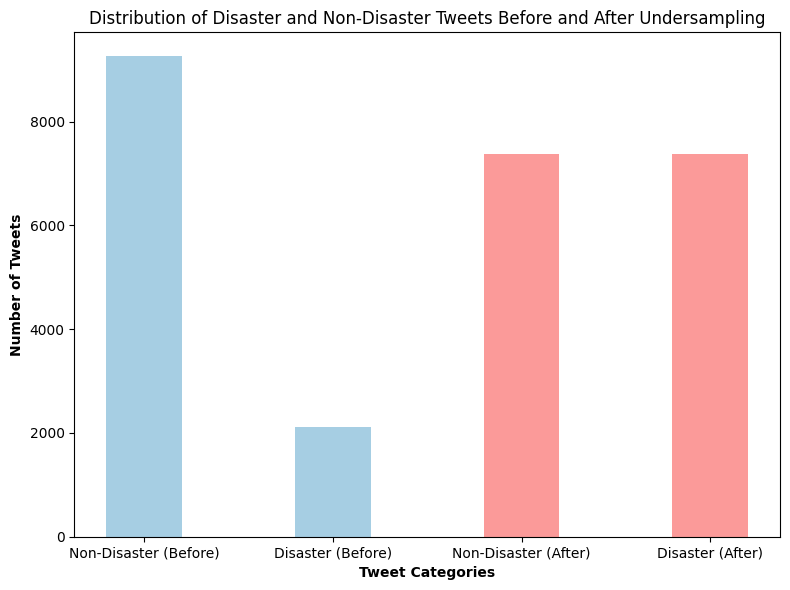

In [44]:
# Initial class distribution
initial_counts = tweets_df['target'].value_counts()

# Class distribution after SMOTE-NC and undersampling
balanced_counts = pd.Series(y_resampled).value_counts()

import matplotlib.pyplot as plt
import numpy as np

# Prepare data for plotting
categories = ['Non-Disaster (Before)', 'Disaster (Before)', 'Non-Disaster (After)', 'Disaster (After)']
before_counts = [initial_counts[0], initial_counts[1]]
after_counts = [balanced_counts[0], balanced_counts[1]]

# Combine data for visualization
counts = before_counts + after_counts
colors = ['#A6CEE3', '#A6CEE3', '#FB9A99', '#FB9A99']

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=colors, width=0.4)

# Add labels
plt.xlabel("Tweet Categories", fontweight='bold')
plt.ylabel("Number of Tweets", fontweight='bold')
plt.title("Distribution of Disaster and Non-Disaster Tweets Before and After Undersampling")
# plt.xticks(rotation=0, ha='right')

# Show plot
plt.tight_layout()
plt.show()


# import matplotlib.pyplot as plt
# import numpy as np

# # Prepare data for plotting
# categories = ['Non-Disaster', 'Disaster']
# before_counts = [initial_counts[0], initial_counts[1]]
# after_counts = [balanced_counts[0], balanced_counts[1]]

# # Set up bar positions
# bar_width = 0.35
# r1 = np.arange(len(categories))
# r2 = [x + bar_width for x in r1]

# # Create the bar chart
# plt.figure(figsize=(8, 6))
# plt.bar(r1, before_counts, color='blue', width=bar_width, edgecolor='grey', label='Before Balancing')
# plt.bar(r2, after_counts, color='green', width=bar_width, edgecolor='grey', label='After Balancing')

# # Add labels
# plt.xlabel('Class', fontweight='bold')
# plt.ylabel('Count', fontweight='bold')
# plt.title('Class Distribution Before and After Balancing')
# plt.xticks([r + bar_width/2 for r in range(len(categories))], categories)
# plt.legend()

# # Show plot
# plt.show()


In [28]:
from imblearn.over_sampling import SMOTENC
import numpy as np

# Specify the indices of categorical features
categorical_features = np.array([False] * X_text.shape[1] + [True] * X_keyword.shape[1])

# Create a list of indices for categorical features
categorical_indices = list(range(X_text.shape[1], X_text.shape[1] + X_keyword.shape[1]))

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_combined, tweets_df['target'])



### Splitting Data into Training and Testing Sets
Splitting the balanced dataset into training and testing sets for unbiased model evaluation.

In [29]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


### BEFORE and AFTER SMOTE-NC Implementation

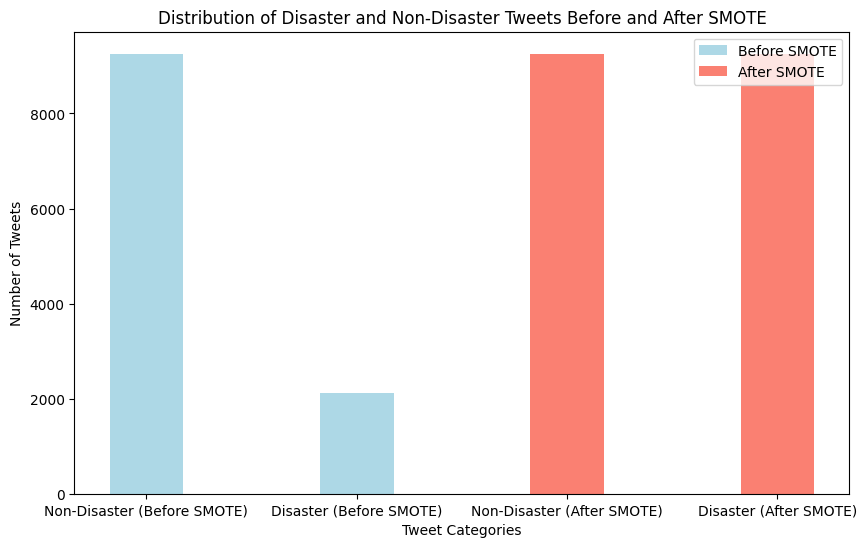

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if tweets_df and y_resampled are defined
if 'tweets_df' in globals() and 'y_resampled' in globals():
    # Count the original distribution before SMOTE
    original_counts = tweets_df['target'].value_counts()

    # Count the distribution after SMOTE
    after_smote_counts = pd.Series(y_resampled).value_counts()

    # Plotting the counts before and after SMOTE
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35  # Bar width

    # Create the bar plot
    ax.bar(['Non-Disaster (Before SMOTE)', 'Disaster (Before SMOTE)'], 
           original_counts, width, label='Before SMOTE', color='lightblue')
    ax.bar(['Non-Disaster (After SMOTE)', 'Disaster (After SMOTE)'], 
           after_smote_counts, width, label='After SMOTE', color='salmon')

    # Add labels, title, and legend
    ax.set_xlabel("Tweet Categories")
    ax.set_ylabel("Number of Tweets")
    ax.set_title("Distribution of Disaster and Non-Disaster Tweets Before and After SMOTE")
    ax.legend()

    # Show plot
    plt.show()
else:
    print("Please ensure 'tweets_df' and 'y_resampled' are defined.")


## 7. Model Training and Evaluation

### 7.1 Logistic Regression
Training and evaluating a Logistic Regression model for binary classification.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Store metrics
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1-Score": f1_score(y_test, y_pred_log_reg)
}



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1869
           1       0.92      0.93      0.93      1834

    accuracy                           0.93      3703
   macro avg       0.93      0.93      0.93      3703
weighted avg       0.93      0.93      0.93      3703



### 7.2 Random Forest Classifier
Training and evaluating a Random Forest classifier to handle complex patterns in the data.

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Store metrics
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1869
           1       0.95      0.96      0.95      1834

    accuracy                           0.95      3703
   macro avg       0.95      0.95      0.95      3703
weighted avg       0.95      0.95      0.95      3703



### 7.3 Support Vector Machine (SVM)
Using SVM with a linear kernel to classify disaster tweets based on high-dimensional data.

In [33]:
from sklearn.svm import SVC

# Initialize and train SVM
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Store metrics
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm)
}

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1869
           1       0.98      0.90      0.94      1834

    accuracy                           0.94      3703
   macro avg       0.94      0.94      0.94      3703
weighted avg       0.94      0.94      0.94      3703



### 7.4 Gradient Boosting Classifier
Applying Gradient Boosting to iteratively improve the classification accuracy.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_clf.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Store metrics
gb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb),
    "F1-Score": f1_score(y_test, y_pred_gb)
}

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1869
           1       0.91      0.74      0.82      1834

    accuracy                           0.84      3703
   macro avg       0.85      0.84      0.83      3703
weighted avg       0.85      0.84      0.83      3703



### 7.5 K-Nearest Neighbors (KNN)
Using a distance-based K-Nearest Neighbors classifier to classify tweets.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Store metrics
knn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn)
}

K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      1869
           1       0.75      0.97      0.85      1834

    accuracy                           0.83      3703
   macro avg       0.86      0.83      0.82      3703
weighted avg       0.86      0.83      0.82      3703



### 7.6 XGBoost
Using a XGboost classifier to classify tweets.

In [36]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Store metrics
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb)
}



C:\Python tutorial\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:22:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1869
           1       0.94      0.87      0.90      1834

    accuracy                           0.91      3703
   macro avg       0.91      0.91      0.91      3703
weighted avg       0.91      0.91      0.91      3703



## 8. Model Comparison
### Tabular Presentation of Classifier Accuracies
Displaying the accuracy of each classifier in a table for easy comparison.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Store metrics
log_reg_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_log_reg),
    "Precision": precision_score(y_test, y_pred_log_reg),
    "Recall": recall_score(y_test, y_pred_log_reg),
    "F1-Score": f1_score(y_test, y_pred_log_reg)
}


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1869
           1       0.92      0.93      0.93      1834

    accuracy                           0.93      3703
   macro avg       0.93      0.93      0.93      3703
weighted avg       0.93      0.93      0.93      3703



In [38]:
import pandas as pd

# Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    "Logistic Regression": log_reg_metrics,
    "Random Forest": rf_metrics,
    "SVM": svm_metrics,
    "XGBoost": xgb_metrics,
    "Gradient Boosting": gb_metrics,
    "KNN": knn_metrics
}).T  # Transpose for better readability

# Display the DataFrame
print(metrics_df)


                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.926816   0.924498  0.928026  0.926259
Random Forest        0.953551   0.951140  0.955289  0.953210
SVM                  0.939779   0.978610  0.898037  0.936594
XGBoost              0.906832   0.941840  0.865322  0.901961
Gradient Boosting    0.836349   0.914865  0.738277  0.817139
KNN                  0.827437   0.751367  0.973828  0.848255


In [39]:
!pip install seaborn matplotlib


DEPRECATION: Loading egg at c:\python tutorial\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
import pandas as pd

# Combine all metrics into a DataFrame
metrics_df = pd.DataFrame({
    "Accuracy": [
        log_reg_metrics["Accuracy"],
        rf_metrics["Accuracy"],
        svm_metrics["Accuracy"],
        xgb_metrics["Accuracy"],
        gb_metrics["Accuracy"],
        knn_metrics["Accuracy"]
    ],
    "Precision": [
        log_reg_metrics["Precision"],
        rf_metrics["Precision"],
        svm_metrics["Precision"],
        xgb_metrics["Precision"],
        gb_metrics["Precision"],
        knn_metrics["Precision"]
    ],
    "Recall": [
        log_reg_metrics["Recall"],
        rf_metrics["Recall"],
        svm_metrics["Recall"],
        xgb_metrics["Recall"],
        gb_metrics["Recall"],
        knn_metrics["Recall"]
    ],
    "F1-Score": [
        log_reg_metrics["F1-Score"],
        rf_metrics["F1-Score"],
        svm_metrics["F1-Score"],
        xgb_metrics["F1-Score"],
        gb_metrics["F1-Score"],
        knn_metrics["F1-Score"]
    ]
}, index=["Logistic Regression", "Random Forest", "SVM", "XGBoost", "Gradient Boosting", "KNN"])

# Display the DataFrame
metrics_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.926816,0.924498,0.928026,0.926259
Random Forest,0.953551,0.951140,0.955289,0.953210
SVM,0.939779,0.978610,0.898037,0.936594
XGBoost,0.906832,0.941840,0.865322,0.901961
Gradient Boosting,0.836349,0.914865,0.738277,0.817139
KNN,0.827437,0.751367,0.973828,0.848255


In [57]:
# Function to highlight the maximum values in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the styling
styled_metrics_df = metrics_df.style.apply(highlight_max, subset=['Accuracy', 'Precision', 'Recall', 'F1-Score']) \
    .set_table_attributes('style="font-size: 14px; border-collapse: collapse; margin: 20px;"') \
    .set_properties(**{'border': '1px solid black', 'text-align': 'center'}) \
    .set_table_styles(
        [{'selector': 'thead th', 
          'props': [('background-color', '#f2f2f2'), ('font-weight', 'bold')]}]
    )

# Display the styled DataFrame in Jupyter Notebook
styled_metrics_df


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.926816,0.924498,0.928026,0.926259
Random Forest,0.953551,0.951140,0.955289,0.953210
SVM,0.939779,0.978610,0.898037,0.936594
XGBoost,0.906832,0.941840,0.865322,0.901961
Gradient Boosting,0.836349,0.914865,0.738277,0.817139
KNN,0.827437,0.751367,0.973828,0.848255


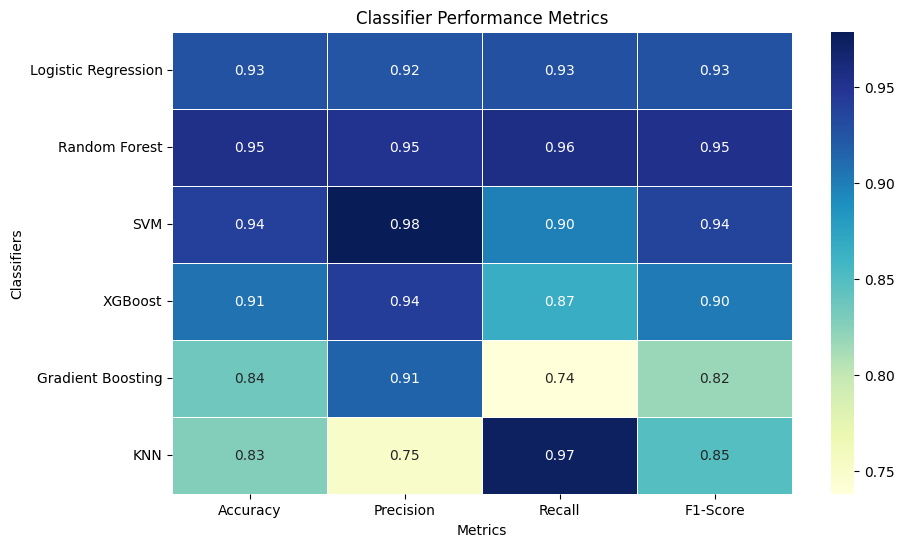

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=.5)
plt.title('Classifier Performance Metrics')
plt.ylabel('Classifiers')
plt.xlabel('Metrics')
plt.show()
